In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import axes3d

from scipy.integrate import quad
from scipy.integrate import dblquad

In [2]:
n = 200
x = np.linspace(-1,1,n+1)
y = np.linspace(-1,1,n+1)

a = 0
b = x[-1]

R = 1

In [3]:
def f(x, y, R=1):
    z = np.sqrt(R**2 - x**2 - y**2)
    if z < 0:
        z = 0
    return z

In [4]:
f = np.vectorize(f)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

/tmp/ipykernel_19695/3739700958.py:2: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(R**2 - x**2 - y**2)
/home/codespace/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2412: RuntimeWarning: invalid value encountered in f (vectorized)
  outputs = ufunc(*inputs)


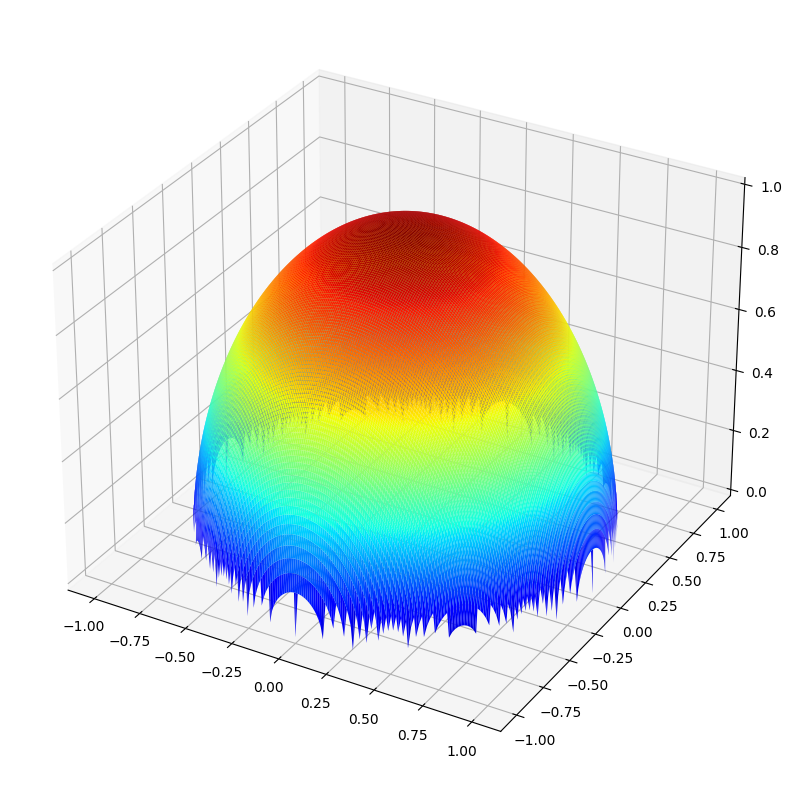

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet')

In [6]:
f2 = lambda x, y: 2*np.pi*x
integral = dblquad(f2, a, b, lambda y: 0, lambda y: np.sqrt(R**2 - y**2))
print(integral, 2*np.pi/3)

(2.0943951023931953, 3.4878520525055084e-14) 2.0943951023931953


In [7]:
def GetLegendre(n, x, y):

    y = (x**2 - 1)**n

    poly = sym.diff(y, x, n) / (2**n * np.math.factorial(n))

    return poly

In [ ]:
def Laguerre(n, x, y):

    y = x**n * np.exp(-x)

    poly = sym.diff(y, x, n) / np.math.factorial(n)

    return poly

In [ ]:
def GetWeights(Roots, DLegendre):

    Dpoly = sym.lambdify([x], DLegendre[n], 'numpy')
    Weights = 2 / ((1 - Roots**2) * Dpoly(Roots)**2)

    return Weights

In [ ]:
x1 = sym.Symbol('x', real=True)
y1 = sym.Symbol('y', real=True)
F = sym.exp(-x1) * x1**(3) * sym.sin(y1)
F


In [ ]:
a = 0.
b = np.pi / 2
I = sym.integrate(F, (x1, 0, sym.oo), (y1, a, b))
I


In [13]:
F_analytic = lambda x, y: np.exp(-x) * x**(3) * np.sin(y)

deg1=5
deg2 = 20
y, wj = np.polynomial.legendre.leggauss(deg2)

x, wi = np.polynomial.laguerre.laggauss(deg1)

def Integrate(F, x, y, wj, wi):

    I = 0
    t = 0.5 * ((b - a) * y + a + b)
    for i in range(deg1):
        for j in range(deg2):
            I += F(x[i], y[j]) * wj[j] * wi[i]

    return I*t

print(Integrate(F_analytic, x, y, wj, wi))

[2.20012849e-21 1.15356957e-20 2.81013348e-20 5.15125435e-20
 8.12210514e-20 1.16530630e-19 1.56613691e-19 2.00530738e-19
 2.47252401e-19 2.95683568e-19 3.44689057e-19 3.93120224e-19
 4.39841887e-19 4.83758934e-19 5.23841995e-19 5.59151573e-19
 5.88860081e-19 6.12271290e-19 6.28836929e-19 6.38172496e-19]
